In [33]:

import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sketch
from shapely.geometry import Point
import time
from translate import Translator

# Configurar pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


df_cyber_salary = pd.read_table("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_salarios_cyber\Cyber_salaries.csv", delimiter=',')



**Dataset:**  
**Descripción:**  
**Periodo:**  

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1|Se trata de la variable que mide x...|||||

DATAFRAME DONDE SE VEN LOS SALARIOS EN RELACION A EXPERIENCIA Y LUGARES DE DESARROLLO, ASI COMO MEDIO A TRAVES DEL QUE SE LLEVA ACABO EL TRABAJO

In [34]:
df_cyber_salary.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M
2,2022,SE,FT,Security Officer,88100,USD,88100,US,0,US,M
3,2022,SE,FT,Security Engineer,163575,USD,163575,US,100,US,M
4,2022,SE,FT,Security Engineer,115800,USD,115800,US,100,US,M
5,2022,MI,FT,Penetration Testing Engineer,40000,EUR,42801,CY,100,CY,L
6,2022,SE,FT,Security Analyst,136600,USD,136600,US,100,US,M
7,2022,SE,FT,Security Analyst,109280,USD,109280,US,100,US,M
8,2022,SE,FT,Security Engineer,211600,USD,211600,US,100,US,M
9,2022,SE,FT,Security Engineer,182160,USD,182160,US,100,US,M


VAMOS A TRADUCIR ESTE DF A ESPAÑOL

In [35]:
#creo un diccionario con la columnas traducidas
diccionario_traducciones = {
    'work_year': 'año laboral',
    'experience_level': 'nivel de experiencia',
    'employment_type': 'tipo de empleo',
    'job_title': 'nombre del puesto',
    'salary': 'salario',
    'salary_currency': 'moneda del salario',
    'salary_in_usd': 'salario en USD',
    'employee_residence': 'residencia del empleado',
    'remote_ratio': 'proporción remota',
    'company_location': 'ubicación de la empresa',
    'company_size': 'tamaño de la empresa'}

In [36]:
# HAGO UNA COPIA POR SI ACASO
df_ciber_salario = df_cyber_salary.copy()


In [37]:
# HAGO UN NUEVO DF CON LAS COLUMNS TRADUCIDAS
df_ciber_salario.rename(columns=diccionario_traducciones, inplace=True)
df_ciber_salario.head(2)

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S
1,2022,SE,FT,Security Officer,123400,USD,123400,US,0,US,M


In [38]:
df_ciber_salario_trad = df_ciber_salario.copy()

In [39]:
#traducir nombre del puesto

# Función para traducir una columna del DataFrame
"""def traducir_columna(df_ciber_salario_trad, columna, idioma_destino):
    translator = Translator(to_lang=idioma_destino)
    df_ciber_salario_trad[columna + '_traducido'] = df_ciber_salario_trad[columna].apply(lambda x: translator.translate(x))
    return df_ciber_salario_trad

# Especifica la columna que deseas traducir y el idioma de destino
columna= "nombre del puesto"
idioma_destino = 'es'

# Aplica la traducción a la columna especificada
df_traducido = traducir_columna(df_ciber_salario_trad, columna, idioma_destino)

# Muestra el DataFrame con la columna traducida
print(df_ciber_salario_trad)"""

'def traducir_columna(df_ciber_salario_trad, columna, idioma_destino):\n    translator = Translator(to_lang=idioma_destino)\n    df_ciber_salario_trad[columna + \'_traducido\'] = df_ciber_salario_trad[columna].apply(lambda x: translator.translate(x))\n    return df_ciber_salario_trad\n\n# Especifica la columna que deseas traducir y el idioma de destino\ncolumna= "nombre del puesto"\nidioma_destino = \'es\'\n\n# Aplica la traducción a la columna especificada\ndf_traducido = traducir_columna(df_ciber_salario_trad, columna, idioma_destino)\n\n# Muestra el DataFrame con la columna traducida\nprint(df_ciber_salario_trad)'

In [40]:
#df_ciber_salario_trad

In [41]:
#creo una tabla con los niveles de experiencia en ciberseguridad, LAS ABREBIATURAS MAS COMUNES Y SU SIGNIFICADO
# Crear un DataFrame con la información proporcionada
data = {
    'Abreviatura': ['EN', 'SE', 'MI', 'SENIOR', 'CTO', 'CISO', 'CEH', 'CISSP', 'CompTIA Security+', 'GIAC', 'EX'],
    'Nivel_o_Certificación': ['Entry-Level (Nivel de Entrada)', 'Security Expert (Experto en Seguridad)', 'Mid-Level (Nivel Intermedio)',
                              'Senior (Senior)', 'Chief Technology Officer (Director de Tecnología)',
                              'Chief Information Security Officer (Oficial Principal de Seguridad de la Información)',
                              'Certified Ethical Hacker', 'Certified Information Systems Security Professional',
                              'CompTIA Security+', 'Global Information Assurance Certification', 'Experienced'],
    'Significado': [
        'Indica un nivel básico de habilidades y experiencia, generalmente adecuado para personas que están comenzando en el campo.',
        'Indica un nivel de experiencia más avanzado en el ámbito de la seguridad informática. Los profesionales con esta designación suelen tener habilidades especializadas en seguridad.',
        'Indica un nivel intermedio de habilidades y experiencia. Las personas en este nivel han adquirido experiencia adicional después del nivel de entrada.',
        'Indica un nivel de experiencia avanzado. Los profesionales senior suelen tener una amplia experiencia y conocimientos en su campo.',
        'Indica un rol de liderazgo en el que la persona es responsable de la dirección tecnológica de una organización.',
        'Indica un rol de liderazgo centrado en la seguridad de la información en una organización.',
        'Certificación que demuestra habilidades en hacking ético y seguridad de sistemas.',
        'Certificación de seguridad de la información reconocida a nivel internacional.',
        'Certificación de seguridad que valida habilidades fundamentales en seguridad informática.',
        'Certificación de seguridad de la información ofrecida por SANS Institute.',
        'Indica un nivel de experiencia muy expecializado en un ambito muy concreto dentro de la ciberseguridad'
    ]
}

df_ciber_experiencia = pd.DataFrame(data)


# Guardar como Excel
df_ciber_experiencia.to_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_salarios_cyber\df_ciber_experiencia_certificaciones.xlsx', index=False)

In [42]:
#VOY A CREAR APARANDOME EN LA TABLA ANTERIOR, UNA NUEVA COLUMNA "TIPOS DE EMPPLEO"
tipos_empleo_ciberseguridad = {
    'FT': {
        'Nombre': 'Full-Time (Tiempo Completo)',
        'Ejemplo': 'Un empleado a tiempo completo trabaja las horas estándar o requeridas por la empresa, generalmente al menos 40 horas a la semana.'
    },
    'PT': {
        'Nombre': 'Part-Time (Tiempo Parcial)',
        'Ejemplo': 'Un empleado a tiempo parcial trabaja un número reducido de horas en comparación con un empleado a tiempo completo. Las horas pueden variar, pero generalmente son menos de 30 horas a la semana.'
    },
    'CT': {
        'Nombre': 'Contract (Contrato)',
        'Ejemplo': 'Un empleado contratado tiene un acuerdo laboral por un período específico o para un proyecto particular. La relación laboral puede finalizar una vez que se complete el contrato.'
    },
    'FL': {
        'Nombre': 'Freelance (Trabajador Autónomo o Independiente)',
        'Ejemplo': 'Un trabajador independiente trabaja de manera autónoma y generalmente es contratado por proyectos específicos. No está vinculado a una empresa de manera permanente.'
    }
}

df_ciber_contratos = pd.DataFrame(tipos_empleo_ciberseguridad)


# Guardar como Excel
df_ciber_contratos.to_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_salarios_cyber/df_ciber_contratos.xlsx', index=False)

In [43]:
# abrirlo
df_ciber_contratos = pd.read_excel(r'E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_salarios_cyber/df_ciber_contratos.xlsx')
df_ciber_contratos.head(1)

,FT,PT,CT,FL
0,Full-Time (Tiempo Completo),Part-Time (Tiempo Parcial),Contract (Contrato),Freelance (Trabajador Autónomo o Independiente)


In [44]:
#df_ciber_salario.head(1)

In [45]:
# COMPRUEBO LAS INICIALES QUE ESTAN EN MI DF
df_ciber_salario["nivel de experiencia"].unique()

array(['EN', 'SE', 'MI', 'EX'], dtype=object)

crear una funcion para establecer la categoria  tipo de empleo 

In [46]:

def empleo2(tipo):
    if tipo == "FT":
        return "Un empleado a tiempo completo trabaja las horas estándar o requeridas por la empresa, generalmente al menos 40 horas a la semana"
    elif tipo == "PT":
        return "Un empleado a tiempo parcial trabaja un número reducido de horas en comparación con un empleado a tiempo completo. Las horas pueden variar, pero generalmente son menos de 30 horas a la semana."
    elif tipo == "CT":
        return "Un empleado contratado tiene un acuerdo laboral por un período específico o para un proyecto particular. La relación laboral puede finalizar una vez que se complete el contrato."
    elif tipo == "FL":
        return "Un trabajador independiente trabaja de manera autónoma y generalmente es contratado por proyectos específicos. No está vinculado a una empresa de manera permanente"
    
# asigno categoria al df_ciber_salrio
df_ciber_salario['significado del empleo'] = df_ciber_salario['tipo de empleo'].apply(empleo2)

In [47]:
def empleo(tipo):
    if tipo == "FT":
        return "Full-Time(Tiempo Completo)"
    elif tipo == "PT":
        return "Part-Time(Tiempo Parcial)"
    elif tipo == "CT":
        return "Contract(Contrato)"
    elif tipo == "FL":
        return "Freelance(Trabajador Autónomo)"
    

# asigno categoria al df_ciber_salrio
df_ciber_salario['categoria de empleo'] = df_ciber_salario['tipo de empleo'].apply(empleo)
        

crear una funCion para establecer la categoria de  nivel de experiencia,

In [48]:
# prosigo con la columna nivel de experiecnia
def certificacion (tipo): 
    if tipo == "EN":
        return "Entry-Level (Nivel de Entrada"
    elif tipo =="SE":
        return "Security Expert (Experto en Seguridad)"
    elif tipo =="MI":
        return "Mid-Level (Nivel Intermedio)"
    elif tipo =="EX":
        return "High Experienced"

 #asigno categoria al df_ciber_salrio
df_ciber_salario['tipo de experiencia'] = df_ciber_salario['nivel de experiencia'].apply(certificacion)
        


In [49]:
#prosigo con la columna nivel de experiecnia
def certificacion2 (tipo): 
    if tipo == "EN":
        return "Indica un nivel básico de habilidades y experiencia, generalmente adecuado para personas que están comenzando en el campo."
    elif tipo =="SE":
        return "Indica un nivel de experiencia más avanzado en el ámbito de la seguridad informática. Los profesionales con esta designación suelen tener habilidades especializadas en seguridad."
    elif tipo =="MI":
        return "Indica un nivel intermedio de habilidades y experiencia. Las personas en este nivel han adquirido experiencia adicional después del nivel de entrada."
    elif tipo =="EX":
        return "Indica un nivel de experiencia muy expecializado en un ambito muy concreto dentro de la ciberseguridad"

 #asigno categoria al df_ciber_salrio
df_ciber_salario['aptitudes por tipo de experiencia'] = df_ciber_salario['nivel de experiencia'].apply(certificacion2)
        

In [50]:
#guardo el df
df_ciber_salario.to_excel("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\df_ciber_salario.xlsx", index=False)

In [51]:
df_ciber_salario.head(1)

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa,significado del empleo,categoria de empleo,tipo de experiencia,aptitudes por tipo de experiencia
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S,"Un empleado a tiempo completo trabaja las horas estándar o requeridas por la empresa, generalmente al menos 40 horas a la semana",Full-Time(Tiempo Completo),Entry-Level (Nivel de Entrada,"Indica un nivel básico de habilidades y experiencia, generalmente adecuado para personas que están comenzando en el campo."


In [52]:
# CARDINALIDAD
df_cardinalidad = pd.DataFrame([df_ciber_salario.nunique(), df_ciber_salario.nunique()/len(df_ciber_salario)*100, df_ciber_salario.dtypes]).T.rename(columns ={0:"card",\
                                                                                                                                    1: "%_card", 2: "Tipo"})

In [53]:
df_cardinalidad

,card,%_card,Tipo
año laboral,3,0.222387,int64
nivel de experiencia,4,0.296516,object
tipo de empleo,4,0.296516,object
nombre del puesto,87,6.449222,object
salario,416,30.837658,int64
moneda del salario,21,1.556709,object
salario en USD,615,45.589325,int64
residencia del empleado,60,4.447739,object
proporción remota,3,0.222387,int64
ubicación de la empresa,57,4.225352,object


In [54]:
#CALCULAMOS LAS MEDIAS DE TODAS LAS COLUMNAS NUMERICAS

df_ciber_salario.describe().loc["mean"]

año laboral            2021.368421
salario              528824.761305
salario en USD       121578.622683
proporción remota        72.238695
Name: mean, dtype: float64

In [55]:
#calculamos las mediana de las columnas numericas es decir el percentil 50

df_ciber_salario.describe().loc["50%"]

año laboral            2022.0
salario              120000.0
salario en USD       115000.0
proporción remota       100.0
Name: 50%, dtype: float64

In [56]:
#calculamos los valores maximos de las columnas numericas

df_ciber_salario.describe().loc["max"]

año laboral               2022.0
salario              500000000.0
salario en USD          899920.0
proporción remota          100.0
Name: max, dtype: float64

In [57]:
#calculamos los valores minimos de las columnas numericas

df_ciber_salario.describe().loc["min"]

año laboral          2020.0
salario              1740.0
salario en USD       2000.0
proporción remota       0.0
Name: min, dtype: float64

In [58]:
#calculamos el valor modal ( que mas se repite) para las columnas categoricas

columnas_categoricas =["nivel de experiencia",
                    "tipo de empleo",
                    "nombre del puesto",
                    "residencia del empleado", 
                    "ubicación de la empresa", 
                    "tamaño de la empresa",
                    "categoria de empleo",
                    "tipo de experiencia",
                    "aptitudes por tipo de experiencia"]

In [59]:
df_ciber_salario[columnas_categoricas].mode().T

,0
nivel de experiencia,SE
tipo de empleo,FT
nombre del puesto,Security Engineer
residencia del empleado,US
ubicación de la empresa,US
tamaño de la empresa,L
categoria de empleo,Full-Time(Tiempo Completo)
tipo de experiencia,Security Expert (Experto en Seguridad)
aptitudes por tipo de experiencia,Indica un nivel de experiencia más avanzado en el ámbito de la seguridad informática. Los profesionales con esta designación suelen tener habilidades especializadas en seguridad.


In [60]:
#vamos a calcular las frecuencias abosolutas de las columas categoricas( con value_counts)

for colum in columnas_categoricas:
    print(f"para {colum}")
    print(df_ciber_salario[colum].value_counts())
    print("\n"*2)

para nivel de experiencia
nivel de experiencia
SE    622
MI    433
EN    218
EX     76
Name: count, dtype: int64



para tipo de empleo
tipo de empleo
FT    1326
CT      11
PT       9
FL       3
Name: count, dtype: int64



para nombre del puesto
nombre del puesto
Security Engineer                             247
Cyber Security Analyst                        134
Penetration Tester                             77
Information Security Manager                   65
Cyber Security Engineer                        63
Security Analyst                               53
Information Security Analyst                   39
Cyber Security Specialist                      31
Information Security Officer                   29
Cyber Threat Intelligence Analyst              29
SOC Analyst                                    28
Chief Information Security Officer             27
Cyber Security Architect                       25
DevSecOps Engineer                             24
Application Security Engineer      

In [61]:
def distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='bottom', xytext=(0, 9), textcoords='offset points', rotation =0)

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

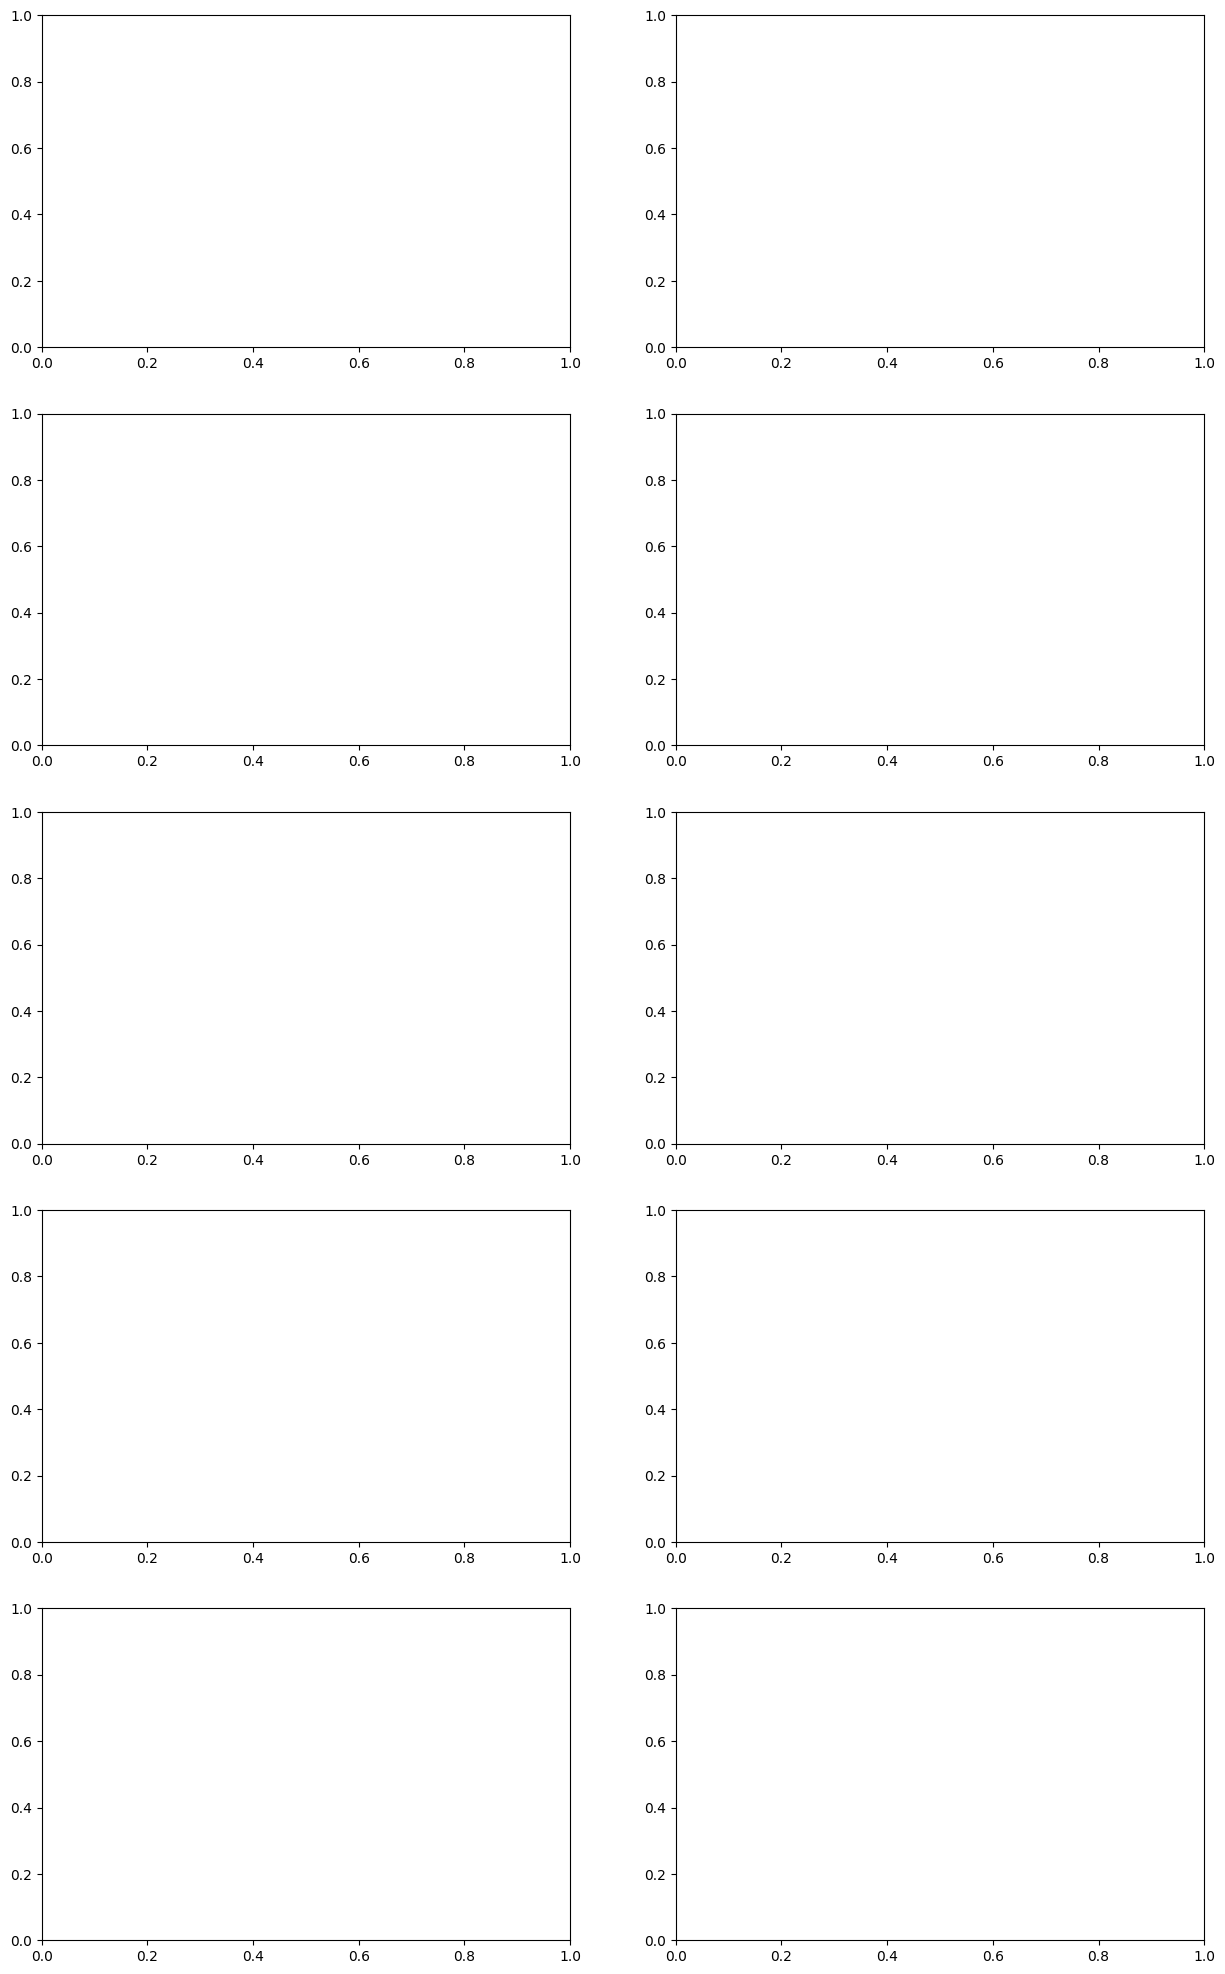

In [62]:
distribucion_categoricas(df_ciber_salario, columnas_categoricas, relativa=False, mostrar_valores=False)


In [63]:
# PARA HALLAR LOS DIAGRAMAS DE CAJAS

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [64]:


def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

QUARTILES (q1-25% q2-50%(mediana)) q3-75%)

In [65]:
df_ciber_salario.describe()

,año laboral,salario,salario en USD,proporción remota
count,1349.000000,1.349000e+03,1349.000000,1349.000000
mean,2021.368421,5.288248e+05,121578.622683,72.238695
std,0.711236,1.361367e+07,68972.954838,39.355331
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,8.000000e+04,75000.000000,50.000000
50%,2022.000000,1.200000e+05,115000.000000,100.000000
75%,2022.000000,1.600800e+05,152000.000000,100.000000
max,2022.000000,5.000000e+08,899920.000000,100.000000


In [66]:
#rando intercuartilico o IQR( diferencia el 75 - el 25)
# quantile es la funcion de pandas pora calcular percentil, al igual que en numpy es percentile

def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

Diagramas de caja, bigotes o boxplot

In [67]:
# para valores numericos
# valos a conseguir las columnas numericas
columnas_numericas= df_ciber_salario.describe().T.index.to_list()
print(columnas_numericas)

['año laboral', 'salario', 'salario en USD', 'proporción remota']


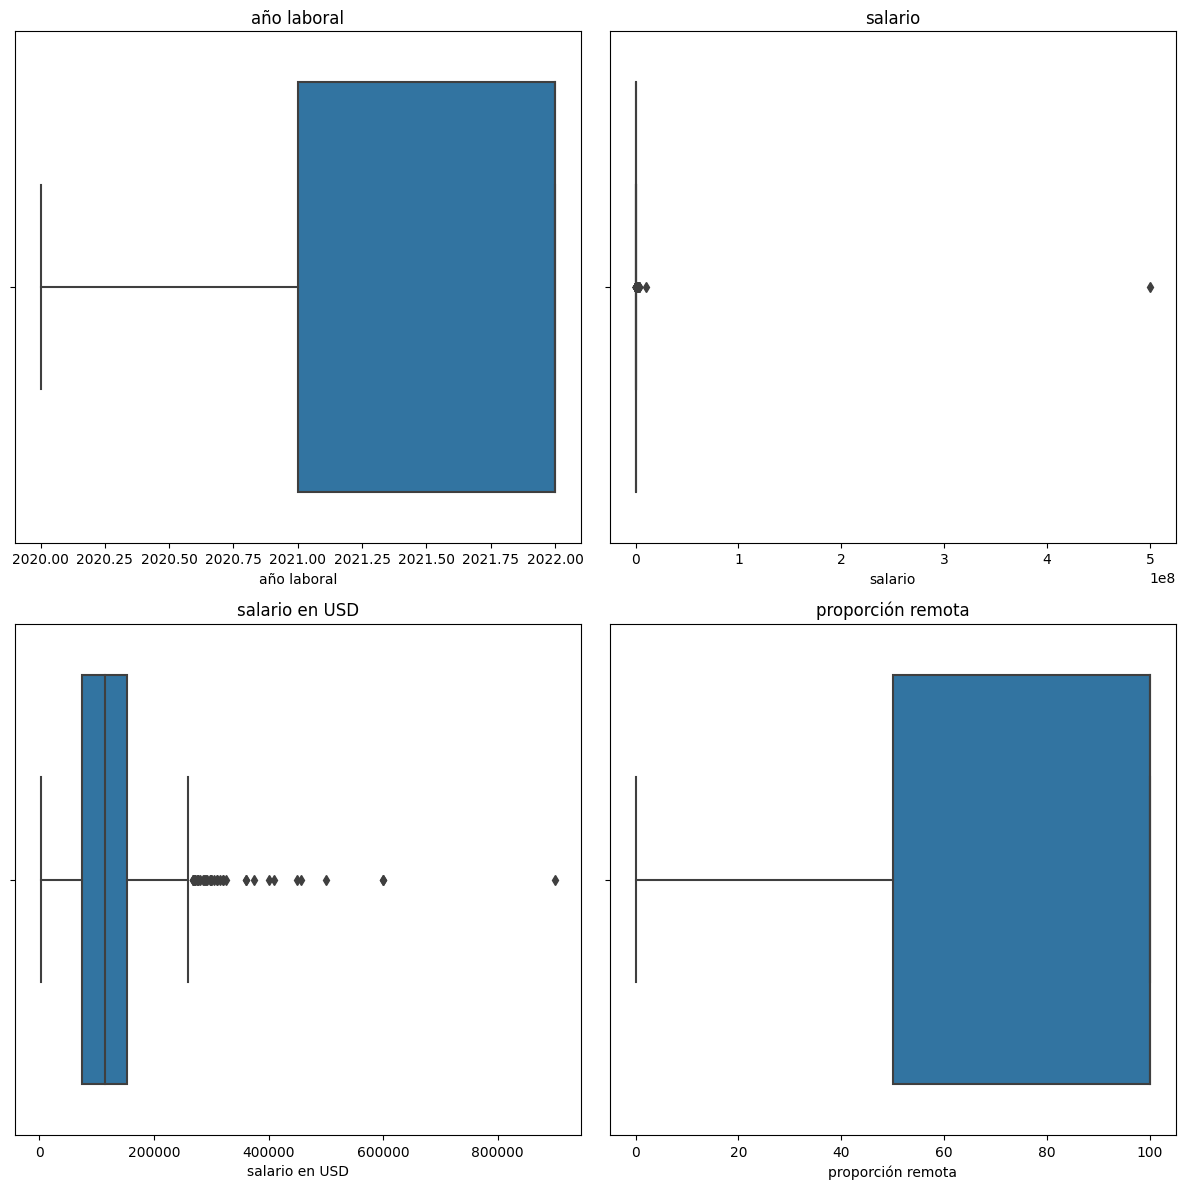

In [68]:
columnas_numericas= ['año laboral', 'salario', 'salario en USD', 'proporción remota']

plot_multiple_boxplots(df_ciber_salario, columnas_numericas)

In [69]:
#vamos a ver el coeficiente de desviacion que es la desviacion tipica (std) entre la media (mean), aqunye tecnicamnet
#es la raiz cuadrada de la varianza, ( CV hasta 15% baja, 15-30:media , +30 = alta)

def coeficiente_variabilidad(df):
    df_var= df.describe().loc[["std","mean"]].T# me quedo con la media y desviacion pero como son filas le hago la inversa para que se vean columnas(T)
    df_var["CV"]= df_var["std"]/df_var["mean"]*100
    return df_var

In [70]:
coeficiente_variabilidad(df_ciber_salario)

,std,mean,CV
año laboral,7.112360e-01,2021.368421,0.035186
salario,1.361367e+07,528824.761305,2574.324579
salario en USD,6.897295e+04,121578.622683,56.731153
proporción remota,3.935533e+01,72.238695,54.479571


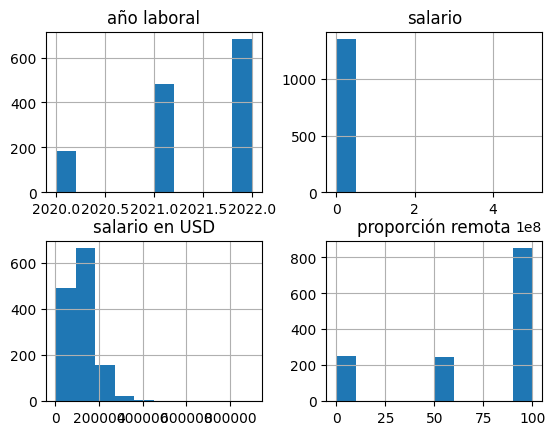

In [72]:
# vamos a ver el histograma

df_ciber_salario.hist();

In [74]:
#FUNCION DENSIDAD DE PROBABILIDAD : SE USARA MUCHO POSTEROMENTE PARA INFERENCIAS EN ESTADISTICA INFERENCIAS Y EN MODELADO DE MACHINE LEARNING

def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


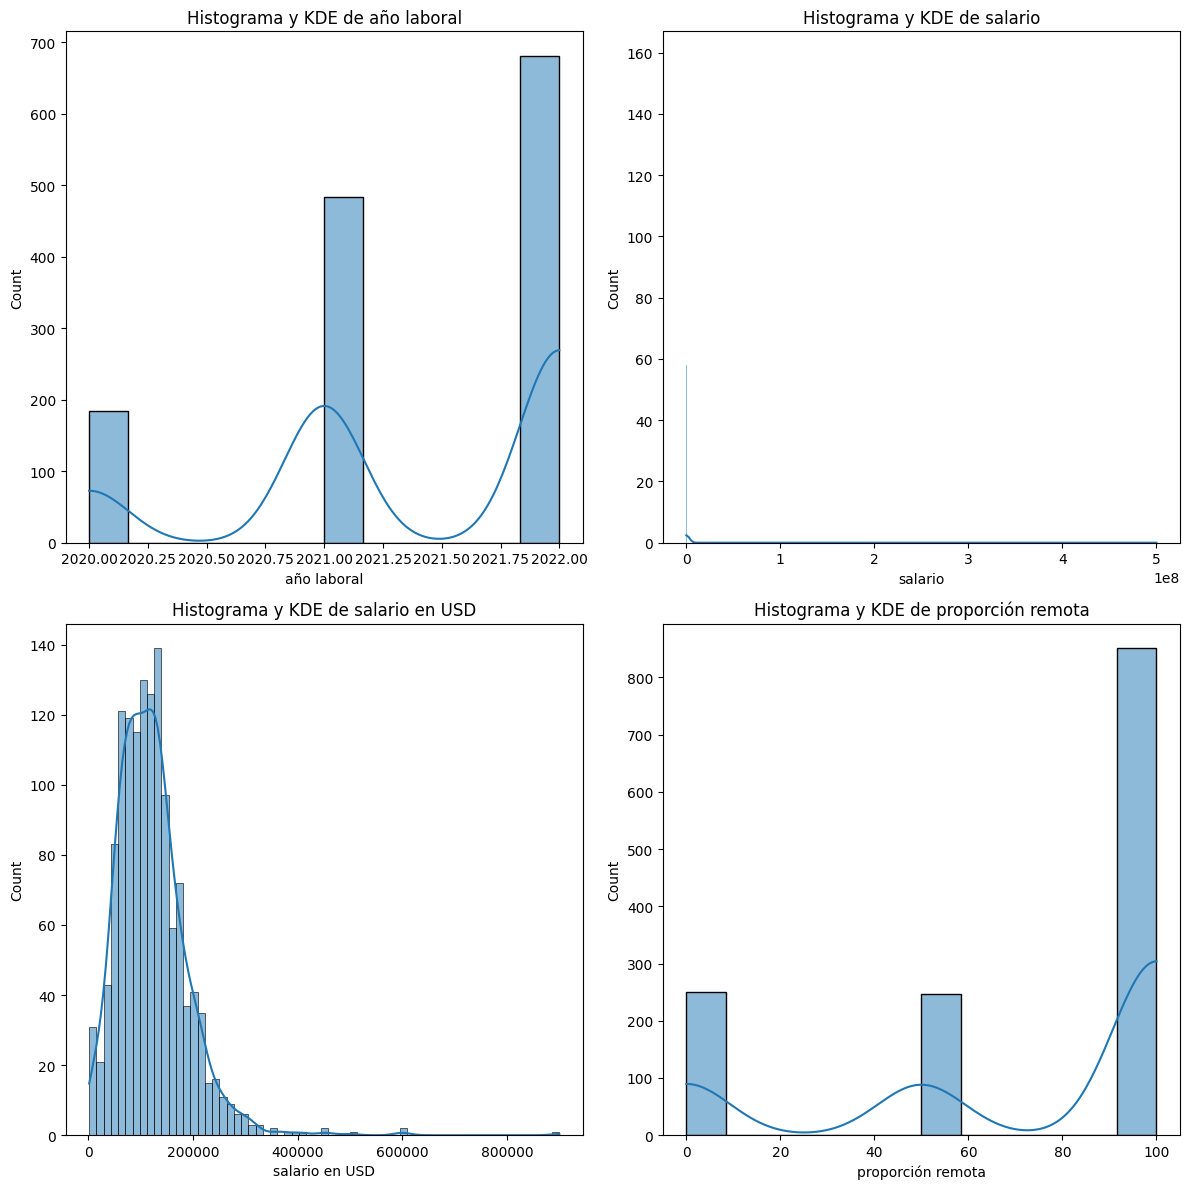

In [75]:
c_numericas= df_ciber_salario.describe().columns.tolist()

plot_histo_den(df_ciber_salario, c_numericas)


In [76]:
# comprobar is existen outliers o valores nulos por excesoo por defecto, para ello es interesante ver el histograma junto el plotbox.
#para ello esta funcion:


def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()


(2,)


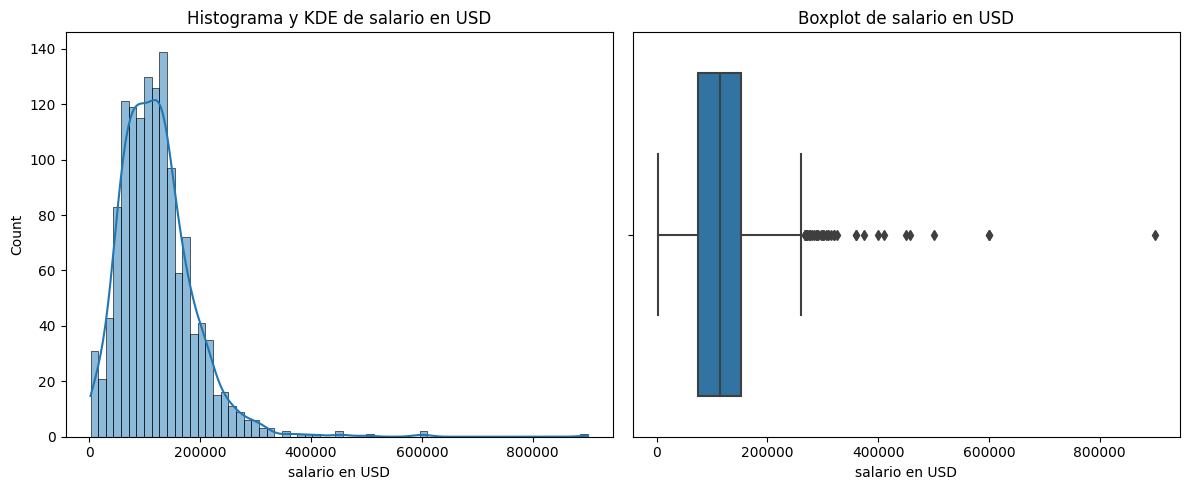

In [82]:
plot_combined_graphs(df_ciber_salario, ["salario en USD"], whisker_width= 1.5) # 3 veces la longitud habitual (que es 1.5*IQR)

# en el plotbox el alor maximo (mediana+1,5 * IQR), el 1.5 es estimado y podemos apmpliarlo lo suyo es empezar 3 veces mas e ir bajando a nuestras necesidades.
# en este caso es mejor dejarlo en 1.5 y vemos que hay outliers despues del maximo, para ello binnearemos(convertir variables continuas en variables categorigas discretas
# a traves de ka creacion de bins)

In [98]:
#BINNING SOBRE SALARIO EN USD

#copia df
df_ciber_salario_bin= df_ciber_salario.copy()

# Definir los bins para la variable 'salario en USD'
bins_salario_USD = [0,30000,100000]

# Binnear las variables en el DataFrame
df_ciber_salario_bin['salario_USD_Bin'] = pd.cut(df_ciber_salario_bin['salario en USD'], bins=bins_salario_USD, labels=['0-30k', '30k-100k'])
# Mostrar el DataFrame resultante
df_ciber_salario_bin.head(1)

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa,significado del empleo,categoria de empleo,tipo de experiencia,aptitudes por tipo de experiencia,salario_USD_Bin
0,2022,EN,FT,Information Security Officer,68000,EUR,72762,DE,100,DE,S,"Un empleado a tiempo completo trabaja las horas estándar o requeridas por la empresa, generalmente al menos 40 horas a la semana",Full-Time(Tiempo Completo),Entry-Level (Nivel de Entrada,"Indica un nivel básico de habilidades y experiencia, generalmente adecuado para personas que están comenzando en el campo.",30k-100k


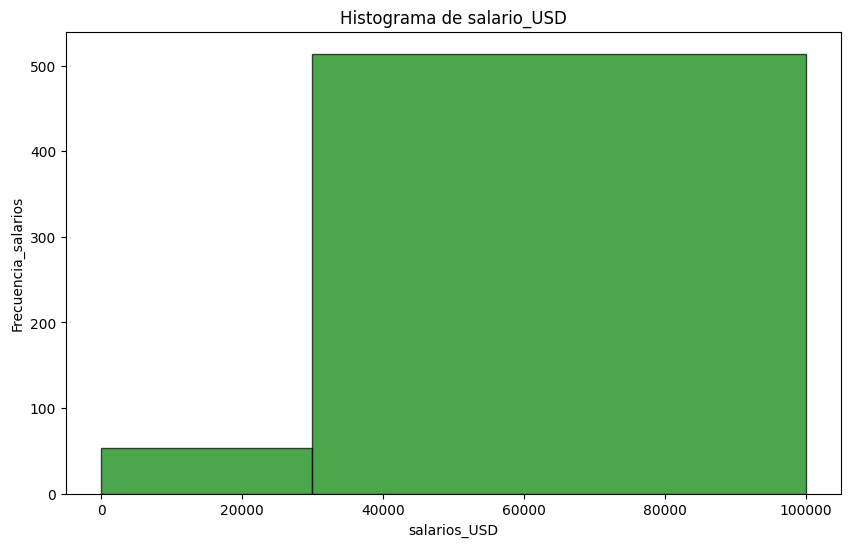

In [101]:
# ahora ya biineado: frecuencia_salario, Analisis descriptivo(estadisticas de salarios)

frecuencia_salarios =df_ciber_salario_bin["salario en USD"].value_counts()

# estadisticas salarios

estadisticas_salarios= df_ciber_salario_bin.groupby("salario_USD_Bin")["salario en USD"].describe()

#historgrama estadisticaas con fracuencia

plt.figure(figsize=(10, 6))
plt.hist(df_ciber_salario_bin['salario en USD'], bins=bins_salario_USD, color='green', edgecolor='black', alpha=0.7)
plt.title('Histograma de salario_USD')
plt.xlabel('salarios_USD')
plt.ylabel('Frecuencia_salarios')
plt.show()





In [104]:
frecuencia_salarios

salario en USD
120000    33
130000    30
150000    29
140000    26
100000    25
160000    23
90000     22
125000    18
80000     18
135000    18
180000    17
75000     17
50000     17
175000    16
110000    15
145000    15
85000     14
60000     14
70000     13
115000    12
200000    12
170000    11
210000    11
65000     11
105000     8
220000     8
165400     8
132320     7
160080     7
55000      7
72000      7
190000     7
106000     6
153000     6
126000     6
108000     6
98000      6
200100     6
240000     5
95000      5
112000     5
59102      5
96000      4
102000     4
128000     4
122000     4
146000     4
153600     4
143000     4
63000      4
165000     4
132000     4
300000     4
127000     4
207000     4
53192      4
152000     4
91000      4
260000     4
104000     4
148000     4
157000     4
220100     3
133000     3
128404     3
134000     3
73000      3
40000      3
155000     3
101399     3
184800     3
30000      3
176080     3
250000     3
230000     3
107000    

In [106]:
estadisticas_salarios.T

salario_USD_Bin,0-30k,30k-100k
count,56.000000,511.000000
mean,15196.017857,71483.422701
std,9032.844901,18233.811722
min,2000.000000,31000.000000
25%,7787.500000,58537.000000
50%,13523.000000,72324.000000
75%,21459.250000,87000.000000
max,30000.000000,100000.000000
